In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize']=(12,6)

In [4]:
df=pd.read_csv('Telco-Customer-Churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [11]:
df.duplicated().sum()

np.int64(0)

# Data Cleaning

In [12]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [13]:
missing_values=df['TotalCharges'].isnull().sum()
missing_values

np.int64(11)

In [14]:
df[df['TotalCharges'].isnull()][['tenure','MonthlyCharges','TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


all missing values for customers with tenure 0, so TotalCharges is likely to be 0 for them

In [15]:
df['TotalCharges'].fillna(0,inplace=True)

C:\Users\rahul\AppData\Local\Temp\ipykernel_24684\1133857973.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0,inplace=True)


In [16]:
df['TotalCharges'].isnull().sum()

np.int64(0)

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
df.drop('customerID',axis=1,inplace=True)

In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
df['Churn']=df['Churn'].map({'Yes':1,'No':0})

In [21]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# EDA

In [23]:
churn_counts=df['Churn'].value_counts().reset_index()
churn_counts.columns=['Churn_Status','Count']

In [24]:
churn_counts

,Churn_Status,Count
0,0,5174
1,1,1869


In [25]:
churn_counts['Churn_Status']=churn_counts['Churn_Status'].map({1:'Yes',0:'No'})

In [26]:
churn_counts

,Churn_Status,Count
0,No,5174
1,Yes,1869


In [27]:
fig=px.pie(churn_counts,names='Churn_Status',values='Count',title='Customer Churn Rate', color_discrete_sequence=px.colors.sequential.Reds_r)
fig.show()

imbalanced dataset

In [28]:
df_plot=df.copy()
df_plot['Churn']=df_plot['Churn'].map({1:'Yes',0:'No'})

In [29]:
demographics_cols=['gender','SeniorCitizen','Partner','Dependents']

In [30]:
for col in demographics_cols:
    fig=px.histogram(df_plot,x=col,color='Churn',barmode='group',title=f'Customer Churn by {col}',
                     color_discrete_map={'No':'#0068C9','Yes':'#FF4B4B'})
    fig.show()

In [31]:
service_cols=['InternetService','OnlineSecurity','TechSupport']

for col in service_cols:
    fig=px.histogram(df_plot,x=col,color='Churn',barmode='group',title=f'Customer Churn by {col}',
                     color_discrete_map={'No':'#0068C9','Yes':'#FF4B4B'})
    fig.show()

In [32]:
billing_cols=['Contract','PaperlessBilling','PaymentMethod']

for col in billing_cols:
    fig=px.histogram(df_plot,x=col,color='Churn',barmode='group',title=f'Customer Churn by {col}',
                     color_discrete_map={'No':'#0068C9','Yes':'#FF4B4B'})
    fig.show()

In [33]:
numeric_cols=['tenure','MonthlyCharges','TotalCharges']

for col in numeric_cols:
    fig=px.violin(df_plot,x='Churn',y=col,color='Churn',box=True,
                  title=f'Distribution of {col} by Churn',
                  color_discrete_map={'No':'#0068C9','Yes':'#FF4B4B'})
    fig.show()

In [34]:
numeric_df=df.select_dtypes(include=[np.number])

In [35]:
corr_matrix=numeric_df.corr()

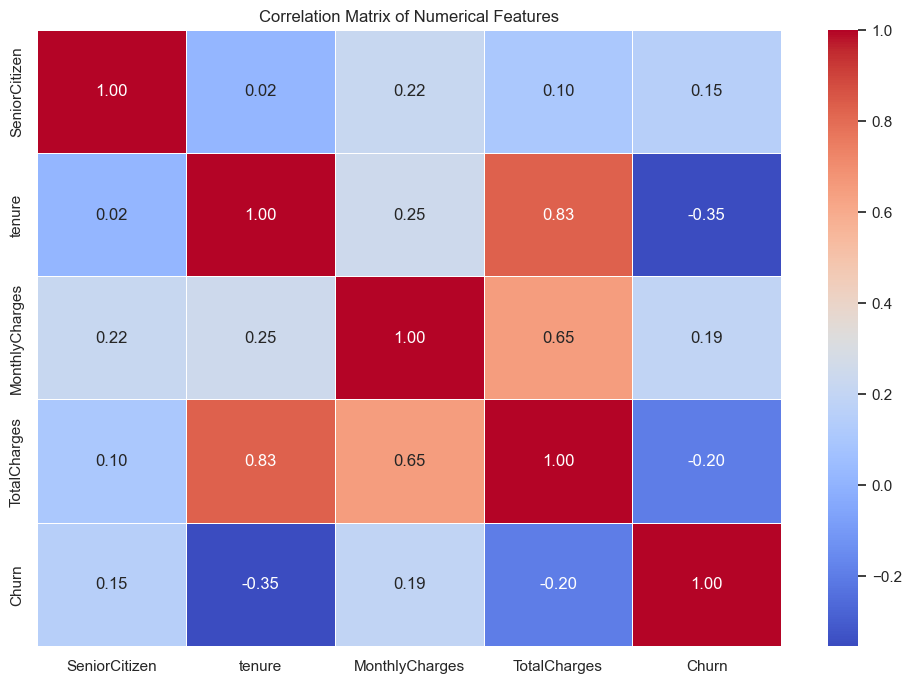

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='coolwarm',linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Feature Engineering

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [38]:
X=df.drop('Churn',axis=1)
y=df['Churn']

X.shape, y.shape

((7043, 19), (7043,))

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

stratify=y because of imbalanced dataset

In [40]:
X_train.shape,X_test.shape

((5634, 19), (1409, 19))

In [41]:
y_train.shape,y_test.shape

((5634,), (1409,))

In [42]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                        'PhoneService', 'MultipleLines', 'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

In [43]:
len(numeric_features)

3

In [44]:
len(categorical_features)

16

In [45]:
numeric_transformer=Pipeline(steps=[
    ('scaler',StandardScaler())
])

categorical_transformer=Pipeline(steps=[
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

In [46]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num',numeric_transformer,numeric_features),
        ('cat',categorical_transformer,categorical_features)
    ]
)

In [47]:
X_train_transformed=preprocessor.fit_transform(X_train)

In [48]:
X_test_transformed=preprocessor.transform(X_test)

In [49]:
X_train.shape, X_train_transformed.shape

((5634, 19), (5634, 46))

In [50]:
X_test.shape,X_test_transformed.shape

((1409, 19), (1409, 46))

# Model Building

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score, RocCurveDisplay

**Model 1- Logistic Regression**

In [52]:
lr_model=LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [53]:
lr_model.fit(X_train_transformed, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [54]:
y_pred_lr=lr_model.predict(X_test_transformed)

In [55]:
accuracy_lr=accuracy_score(y_test,y_pred_lr)
recall_lr=recall_score(y_test,y_pred_lr)
precision_lr=precision_score(y_test,y_pred_lr)
f1_lr=f1_score(y_test,y_pred_lr)
roc_auc_lr=roc_auc_score(y_test,lr_model.predict_proba(X_test_transformed)[:,1])

In [56]:
print(classification_report(y_test, y_pred_lr, target_names=['No Churn (0)', 'Churn (1)']))

              precision    recall  f1-score   support

No Churn (0)       0.90      0.72      0.80      1035
   Churn (1)       0.50      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [57]:
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Recall (for Churn=1): {recall_lr:.4f}  <-- This is our key metric!")
print(f"Precision (for Churn=1): {precision_lr:.4f}")
print(f"F1-Score (for Churn=1): {f1_lr:.4f}")
print(f"ROC AUC Score: {roc_auc_lr:.4f}")

Accuracy: 0.7381
Recall (for Churn=1): 0.7834  <-- This is our key metric!
Precision (for Churn=1): 0.5043
F1-Score (for Churn=1): 0.6136
ROC AUC Score: 0.8415


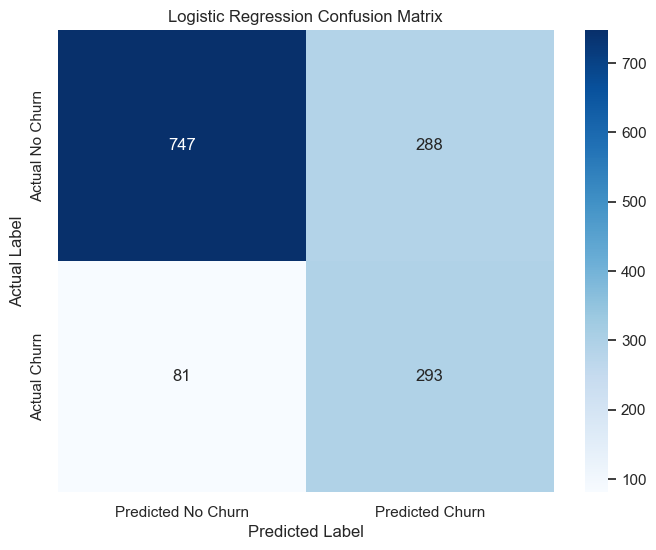

In [58]:
confusion_lr=confusion_matrix(y_test,y_pred_lr)

plt.figure(figsize=(8,6))
sns.heatmap(confusion_lr,annot=True,fmt='d',cmap='Blues',
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])

plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

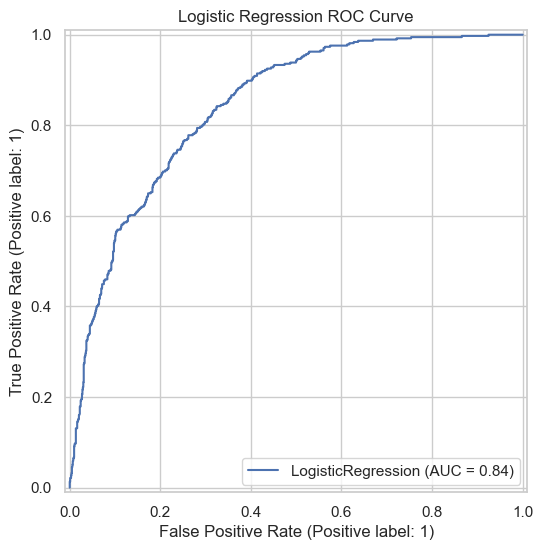

In [59]:
RocCurveDisplay.from_estimator(lr_model,X_test_transformed,y_test)
plt.title('Logistic Regression ROC Curve')
plt.show()

**Model 2- Random Forest Classifier**

In [60]:
rf_model=RandomForestClassifier(class_weight='balanced',random_state=42)

In [61]:
rf_model.fit(X_train_transformed,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [62]:
y_pred_rf=rf_model.predict(X_test_transformed)

In [63]:
print(classification_report(y_test, y_pred_rf, target_names=['No Churn (0)', 'Churn (1)']))

              precision    recall  f1-score   support

No Churn (0)       0.83      0.90      0.86      1035
   Churn (1)       0.64      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [64]:
accuracy_rf=accuracy_score(y_test,y_pred_rf)
recall_rf=recall_score(y_test,y_pred_rf)
precision_rf=precision_score(y_test,y_pred_rf)
f1_rf=f1_score(y_test,y_pred_rf)
roc_auc_rf=roc_auc_score(y_test,rf_model.predict_proba(X_test_transformed)[:,1])

In [65]:
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Recall (for Churn=1): {recall_rf:.4f}  <-- Our key metric!")
print(f"Precision (for Churn=1): {precision_rf:.4f}")
print(f"F1-Score (for Churn=1): {f1_rf:.4f}")
print(f"ROC AUC Score: {roc_auc_rf:.4f}")

Accuracy: 0.7906
Recall (for Churn=1): 0.4840  <-- Our key metric!
Precision (for Churn=1): 0.6396
F1-Score (for Churn=1): 0.5510
ROC AUC Score: 0.8222


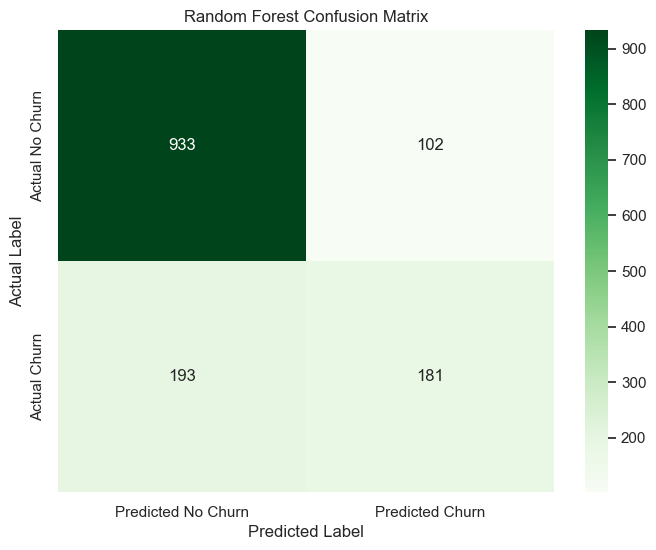

In [66]:
confusion_rf=confusion_matrix(y_test,y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(confusion_rf,annot=True,fmt='d',cmap='Greens',
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])

plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

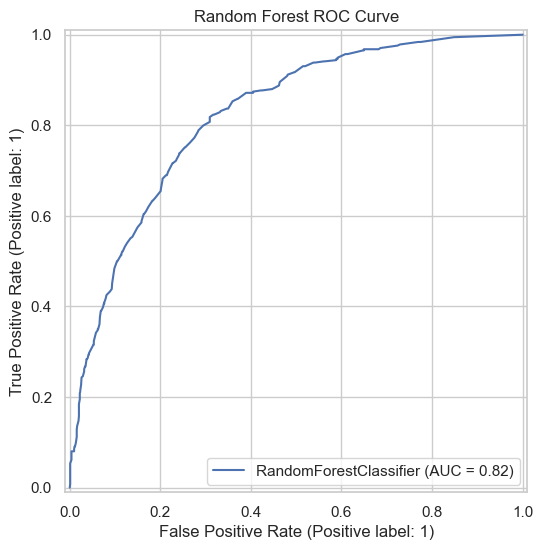

In [67]:
RocCurveDisplay.from_estimator(rf_model,X_test_transformed,y_test)
plt.title('Random Forest ROC Curve')
plt.show()

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV

import time

In [69]:
#for XGBoost
scale_pos_weight=y_train.value_counts()[0] / y_train.value_counts()[1]

In [70]:
print(f"Calculated scale_pos_weight for XGBoost: {scale_pos_weight:.2f}")

Calculated scale_pos_weight for XGBoost: 2.77


In [71]:
models = {
    'LogisticRegression': (
        LogisticRegression(max_iter=1000, random_state=42),
        {
            'C': np.logspace(-3, 3, 7), # Regularization strength
            'solver': ['liblinear'],
            'class_weight': ['balanced'] # Crucial for recall
        }
    ),
    'RandomForest': (
        RandomForestClassifier(random_state=42),
        {
            'n_estimators': [100, 200, 300], # Number of trees
            'max_depth': [10, 20, 30, None], # Tree depth
            'min_samples_leaf': [1, 2, 4],
            'class_weight': ['balanced'] # Crucial for recall
        }
    ),
    'KNeighbors': (
        KNeighborsClassifier(),
        {
            'n_neighbors': [3, 5, 7, 9, 11], # Number of neighbors
            'weights': ['uniform', 'distance'],
            'metric': ['minkowski', 'euclidean']
        }
    ),
    'SVC': (
        SVC(probability=True, random_state=42), # probability=True is needed for ROC AUC
        {
            'C': [0.1, 1, 10], # Regularization strength
            'kernel': ['linear', 'rbf'], # Type of kernel
            'gamma': ['scale', 'auto'],
            'class_weight': ['balanced'] # Crucial for recall
        }
    ),
    'GradientBoosting': (
        GradientBoostingClassifier(random_state=42),
        {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    ),
    'XGBoost': (
        XGBClassifier(random_state=42, eval_metric='logloss'),
        {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'scale_pos_weight': [scale_pos_weight] # Crucial for recall
        }
    )
}

In [72]:
best_models={}

results=[]

for model_name, (model,params) in models.items():
    start_time=time.time()
    print(f"--- Tuning {model_name} ---")
    
    search=RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=10,
        cv=5,
        scoring='recall',
        random_state=42,
        n_jobs=-1,
        verbose=1
    )
    
    search.fit(X_train_transformed,y_train)
    
    print(f"\n Best parameters for {model_name}: {search.best_params_}")
    
    best_model=search.best_estimator_
    best_models[model_name]=best_model
    
    y_pred=best_model.predict(X_test_transformed)
    #Get probabilities for ROC AUC
    #try/except as 'predict_proba' different for SVC
    try:
        y_prob=best_model.predict_proba(X_test_transformed)[:,1]
    except AttributeError:
        y_prob=best_model.decision_function(X_test_transformed)
        #Rescale for ROC AUC
        y_prob=(y_prob - y_prob.min())/(y_prob.max()-y_prob.min())
        
    
        
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    
    results.append({
        'Model': model_name,
        'Recall (Churn=1)': recall,
        'Precision (Churn=1)': precision,
        'F1-Score (Churn=1)': f1,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Best Params': search.best_params_
    })
    
    end_time=time.time()
    print(f"Time taken for {model_name}: {end_time - start_time:.2f} seconds")
    
    print("\nFull Classification Report on Test Set:")
    print(classification_report(y_test, y_pred, target_names=['No Churn (0)', 'Churn (1)']))
    print("-" * 30, "\n")        

--- Tuning LogisticRegression ---
Fitting 5 folds for each of 7 candidates, totalling 35 fits


c:\Users\rahul\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning:

The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.




 Best parameters for LogisticRegression: {'solver': 'liblinear', 'class_weight': 'balanced', 'C': np.float64(0.001)}
Time taken for LogisticRegression: 10.67 seconds

Full Classification Report on Test Set:
              precision    recall  f1-score   support

No Churn (0)       0.91      0.70      0.79      1035
   Churn (1)       0.49      0.81      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.73      0.74      1409

------------------------------ 

--- Tuning RandomForest ---
Fitting 5 folds for each of 10 candidates, totalling 50 fits

 Best parameters for RandomForest: {'n_estimators': 300, 'min_samples_leaf': 4, 'max_depth': 10, 'class_weight': 'balanced'}
Time taken for RandomForest: 16.00 seconds

Full Classification Report on Test Set:
              precision    recall  f1-score   support

No Churn (0)       0.90      0.78      0.83      1035
   Churn (1)       0.55 

In [73]:
results_df=pd.DataFrame(results).sort_values(by='Recall (Churn=1)',ascending=False)

results_df.set_index('Model',inplace=True)

print("--- Final Model Comparison (Sorted by Recall) ---")
results_df[['Recall (Churn=1)', 'Precision (Churn=1)', 'F1-Score (Churn=1)', 'Accuracy', 'ROC AUC']]

--- Final Model Comparison (Sorted by Recall) ---


,Recall (Churn=1),Precision (Churn=1),F1-Score (Churn=1),Accuracy,ROC AUC
Model,,,,,
SVC,0.820856,0.457526,0.587560,0.694109,0.826976
XGBoost,0.810160,0.498355,0.617108,0.733144,0.836856
LogisticRegression,0.807487,0.491057,0.610718,0.726757,0.835736
RandomForest,0.748663,0.549020,0.633484,0.770050,0.841904
KNeighbors,0.566845,0.584022,0.575305,0.777857,0.813989
GradientBoosting,0.516043,0.665517,0.581325,0.802697,0.843270


# Model Interpretation

WE'LL SELECT SVC AS OUR WINNING MODEL

In [74]:
WINNING_MODEL_NAME='SVC'

best_model=best_models[WINNING_MODEL_NAME]

print(best_model)

SVC(C=10, class_weight='balanced', gamma='auto', kernel='linear',
    probability=True, random_state=42)


In [75]:
feature_names=preprocessor.get_feature_names_out()

print(f"Total features in out processed data: {len(feature_names)}")
print("\n First 10 feature names: ")
print(feature_names[:10])

Total features in out processed data: 46

 First 10 feature names: 
['num__tenure' 'num__MonthlyCharges' 'num__TotalCharges'
 'cat__gender_Female' 'cat__gender_Male' 'cat__SeniorCitizen_0'
 'cat__SeniorCitizen_1' 'cat__Partner_No' 'cat__Partner_Yes'
 'cat__Dependents_No']


In [76]:
if hasattr(best_model,'coef_'):
    print("Model is linear. Extracting coefficients (coef_)...")
    importances=best_model.coef_[0]
    
    feature_importances_df=pd.DataFrame({
        'Feature':feature_names,
        'Importance':importances
    }).sort_values(by='Importance',ascending=False)
    
    #Separating into drivers(positive) and protectors(negative)
    churn_drivers=feature_importances_df.head(10).sort_values(by='Importance',ascending=False)
    churn_protectors=feature_importances_df.tail(10).sort_values(by='Importance',ascending=True)
    
    plot_df=pd.concat([churn_drivers,churn_protectors]).sort_values(by='Importance')
    
    fig=px.bar(plot_df,x='Importance',y='Feature',orientation='h',
               color='Importance',
               color_continuous_scale=px.colors.diverging.RdBu,
               title=f"Top 10 Churn Drivers & Protectors ({WINNING_MODEL_NAME})")
    
    fig.show()
    
elif hasattr(best_model,'feature_importances_'):
    print("Model is tree based. Extracting feature importances...")
    importances=best_model.feature_importances_
    
    feature_importances_df=pd.DataFrame({
        'Feature':feature_names,
        'Importance':importances
    }).sort_values(by='Importance',ascending=False)
    
    plot_df=feature_importances_df.head(15)
    
    fig=px.bar(plot_df,x='Importance',y='Feature',orientation='h',
               color='Importance',
               color_continuous_scale=px.colors.sequential.Viridis,
               title=f"Top 15 Most Important Features ({WINNING_MODEL_NAME})")
    
    fig.update_layout(yaxis=dict(autoorange='reversed'))
    fig.show()
    
else:
    print(f"Could not extract features importances for model type: {WINNING_MODEL_NAME}")    
        

Model is linear. Extracting coefficients (coef_)...


In [77]:
import pickle

with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

results_df.to_csv('model_comparison_results.csv')